## Assignment 2

### Stefenie Pickston

#### 1506427

*This is the notebook from Assignment 1 which has been copied for Assignment 2. There have been some modifications to fit the new assignment specification, these are commented with markdown where appropriate.*

In [1]:
# PRE-WRITTEN CONTENT
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wisconsin-breast-cancer-cytology-features/wisconsin_breast_cancer.csv


In this next section we are going to load the data, and use a line of code pre-written above. We know it will load the correct file because the file path and name is printed out. 

In [2]:
# Load Data
df = pd.read_csv (os.path.join(dirname, filename))
# Check 
print('Loaded...')

Loaded...


We are now going to perform that the dataset has been loaded correctly by checking its information and looking at the head (first 6 lines) of the file. 

In [3]:
# Get the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         699 non-null    int64  
 1   thickness  699 non-null    int64  
 2   size       699 non-null    int64  
 3   shape      699 non-null    int64  
 4   adhesion   699 non-null    int64  
 5   single     699 non-null    int64  
 6   nuclei     683 non-null    float64
 7   chromatin  699 non-null    int64  
 8   nucleoli   699 non-null    int64  
 9   mitosis    699 non-null    int64  
 10  class      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [4]:
# Look at the head of the file to check the data seems correct. 
df.head()

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


Now we want to visualise the dataset by way of plotting it. We are going to be using a pairplot. 

#### Visualising the Data

In [5]:
# Required importing of libraries. 
import seaborn as sns

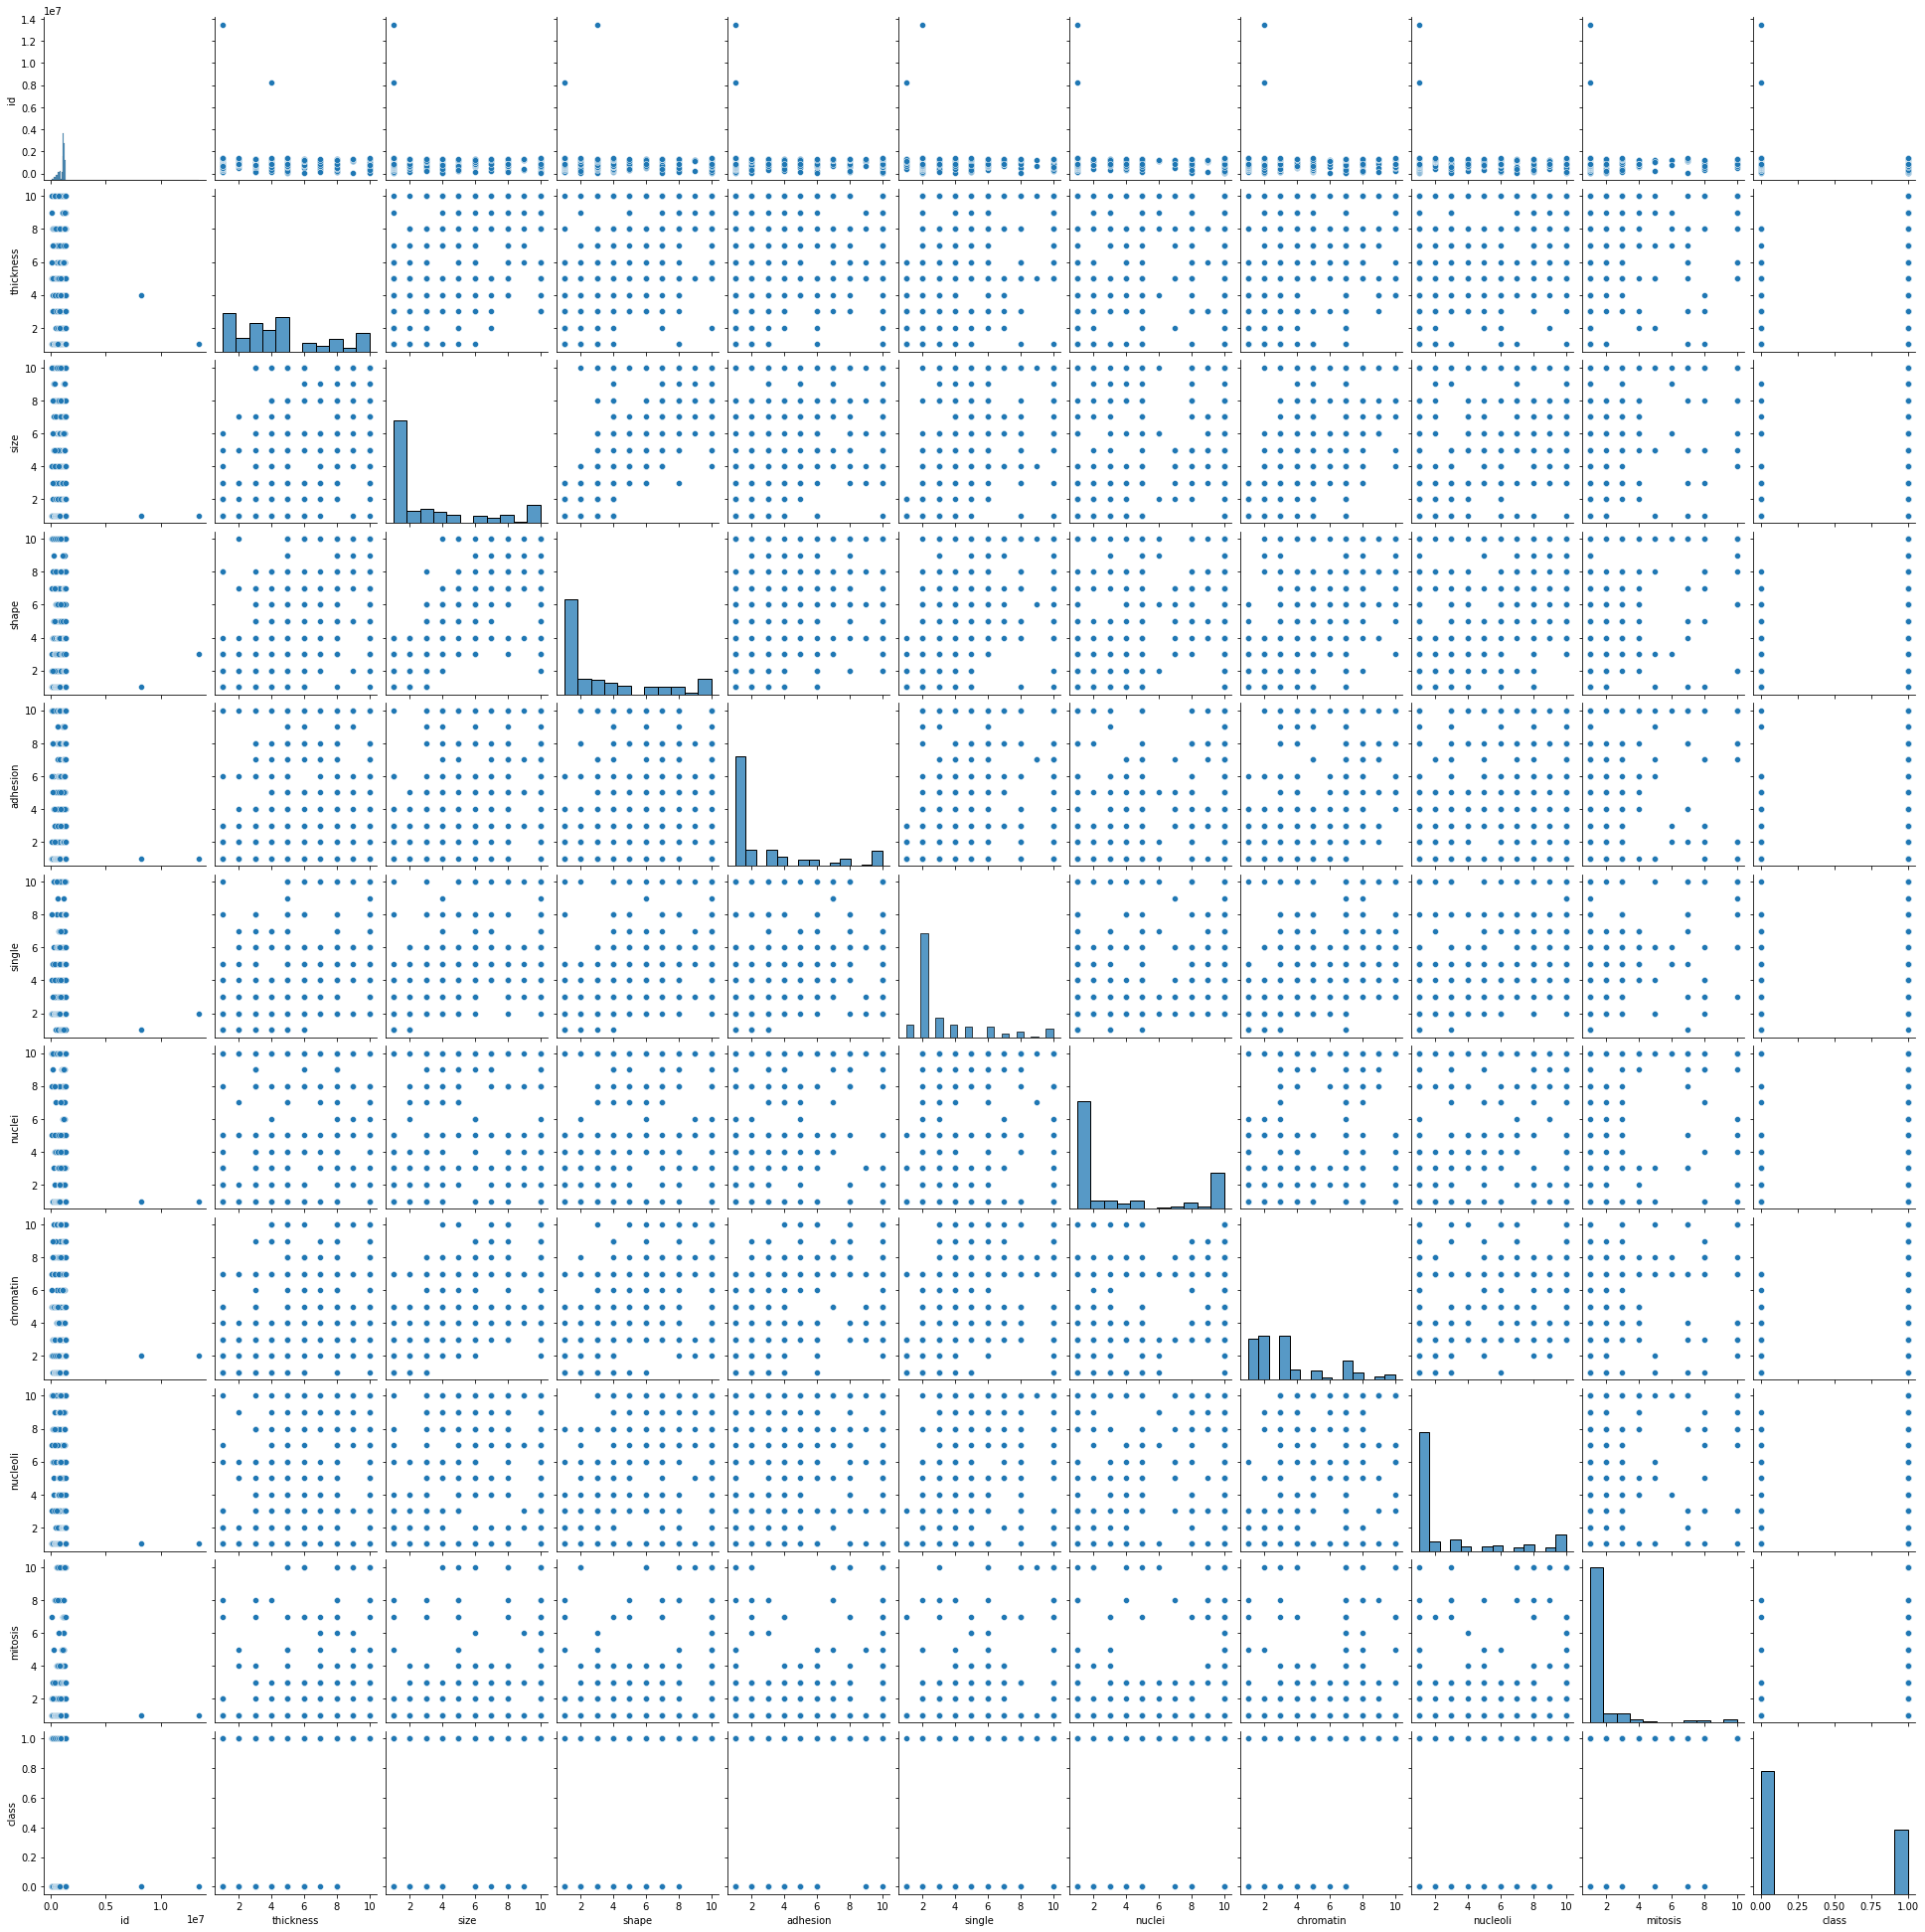

In [6]:
# Create a pairplot of the data (basic)
plot = sns.pairplot(data=df)

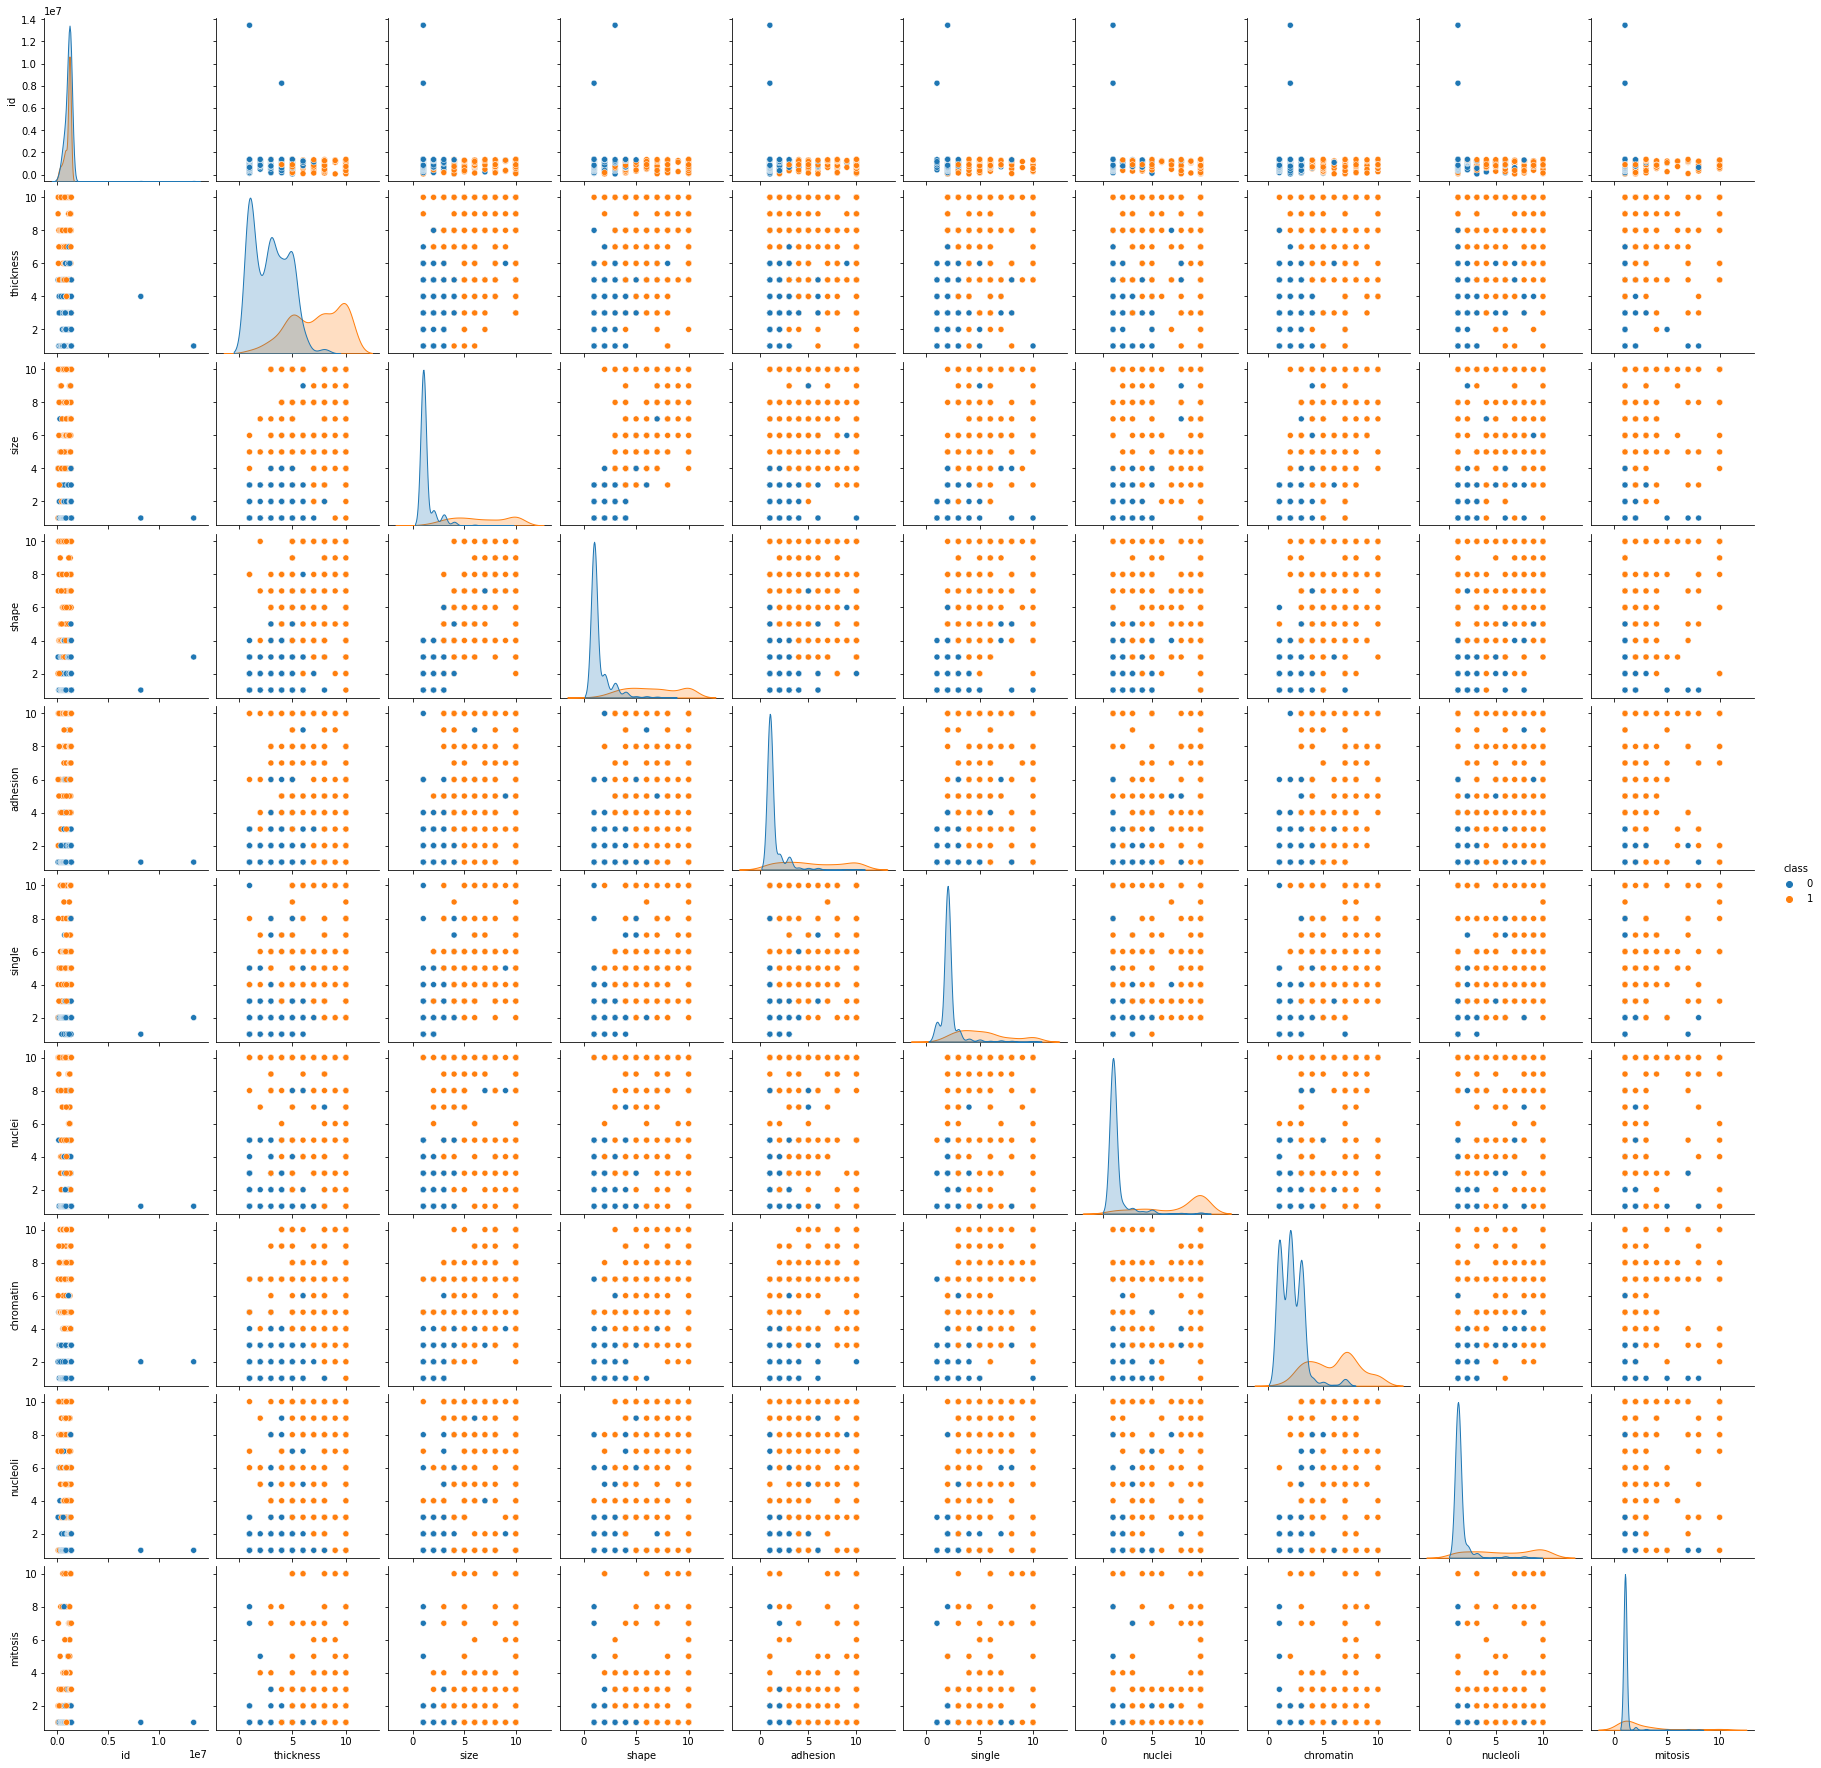

In [7]:
# Create a pairplot with different colours for further analysis. 
coloured_plot = sns.pairplot(data = df, hue = "class")

We can see from the visualisation of the data, that there is some overlap between the two classes, this could mean that our classifier may not be entirely accurate as the classes have features that seem to nto be able to provide a clear distinction between the classes alone. 

Now we are going to split the dataset into a training and test (validation) sets. 

#### Classifying the Dataset

Firstly we need to ensure there are no null values or missing values from the dataset. 

In [8]:
df = df.fillna(0)

In [9]:
# Required importing of libraries
from sklearn.model_selection import train_test_split

We are going to have to split the dataset into two variables X and Y. We have counted that there are 10 variables in the dataset, therefore the variable X will be the first 9 variables, and the variable Y will be the last variable observed (class). 

In [10]:
# Get X and Y variables. 
x = df.iloc[:, 1:10]
y = df.iloc[:, 10]
# Check Class is selected for Y. 
y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 699, dtype: int64

In [11]:
# Split the dataset according to assignment spec.
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.25, random_state = 1506427)
# Check
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(524, 9) (175, 9) (524,) (175,)


Note that in Assignment 1, the dataset had an 80/20 split for training and testing data. The Assignent 2 Specification states to follow on from Assignment 1, but then talks about a 75/25 split for training and testing. The split has been modified from the 80/20 split in Assignment 1 to a 75/25 split for Assignment 2, to fit the specification. 

Now that we have split the dataset, we can train a SVC classifier (on the training set). This model (classifier) will be used to predict the test set. 

In [12]:
# Required importing from libraries
from sklearn.svm import SVC
# Creating and training the classifier
model=SVC().fit(x_train, y_train)
print('Classifier Trained...')

Classifier Trained...


In [13]:
# Predicting using the classifier previously made.
predictions = model.predict(x_test)
print(predictions[:9])
y_test[:9]

[1 0 0 0 0 0 0 1 0]


353    1
397    0
8      0
542    0
341    0
596    0
378    0
604    1
538    0
Name: class, dtype: int64

Now we are going to generate a classification report and confusion matrix. 

#### Classification Report

In [14]:
# Required importing of libraries
from sklearn.metrics import classification_report

In [15]:
# Generate and print the classification report.
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       112
           1       1.00      0.95      0.98        63

    accuracy                           0.98       175
   macro avg       0.99      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175



#### Confusion Matrix

In [16]:
# Required importing of libraries
from sklearn.metrics import confusion_matrix

In [17]:
# Generate and print the confusion matrix. 
confusion = confusion_matrix(y_test, predictions)
print(confusion)

[[112   0]
 [  3  60]]


### *Assignment 2 begins here...*

Note there have been changes made above to the original Assignment 1 - comments have been made where relevant. 

### Stefenie Pickston
#### 1506427

Let's generate the pairplot again so we don't have to keep scrolling...

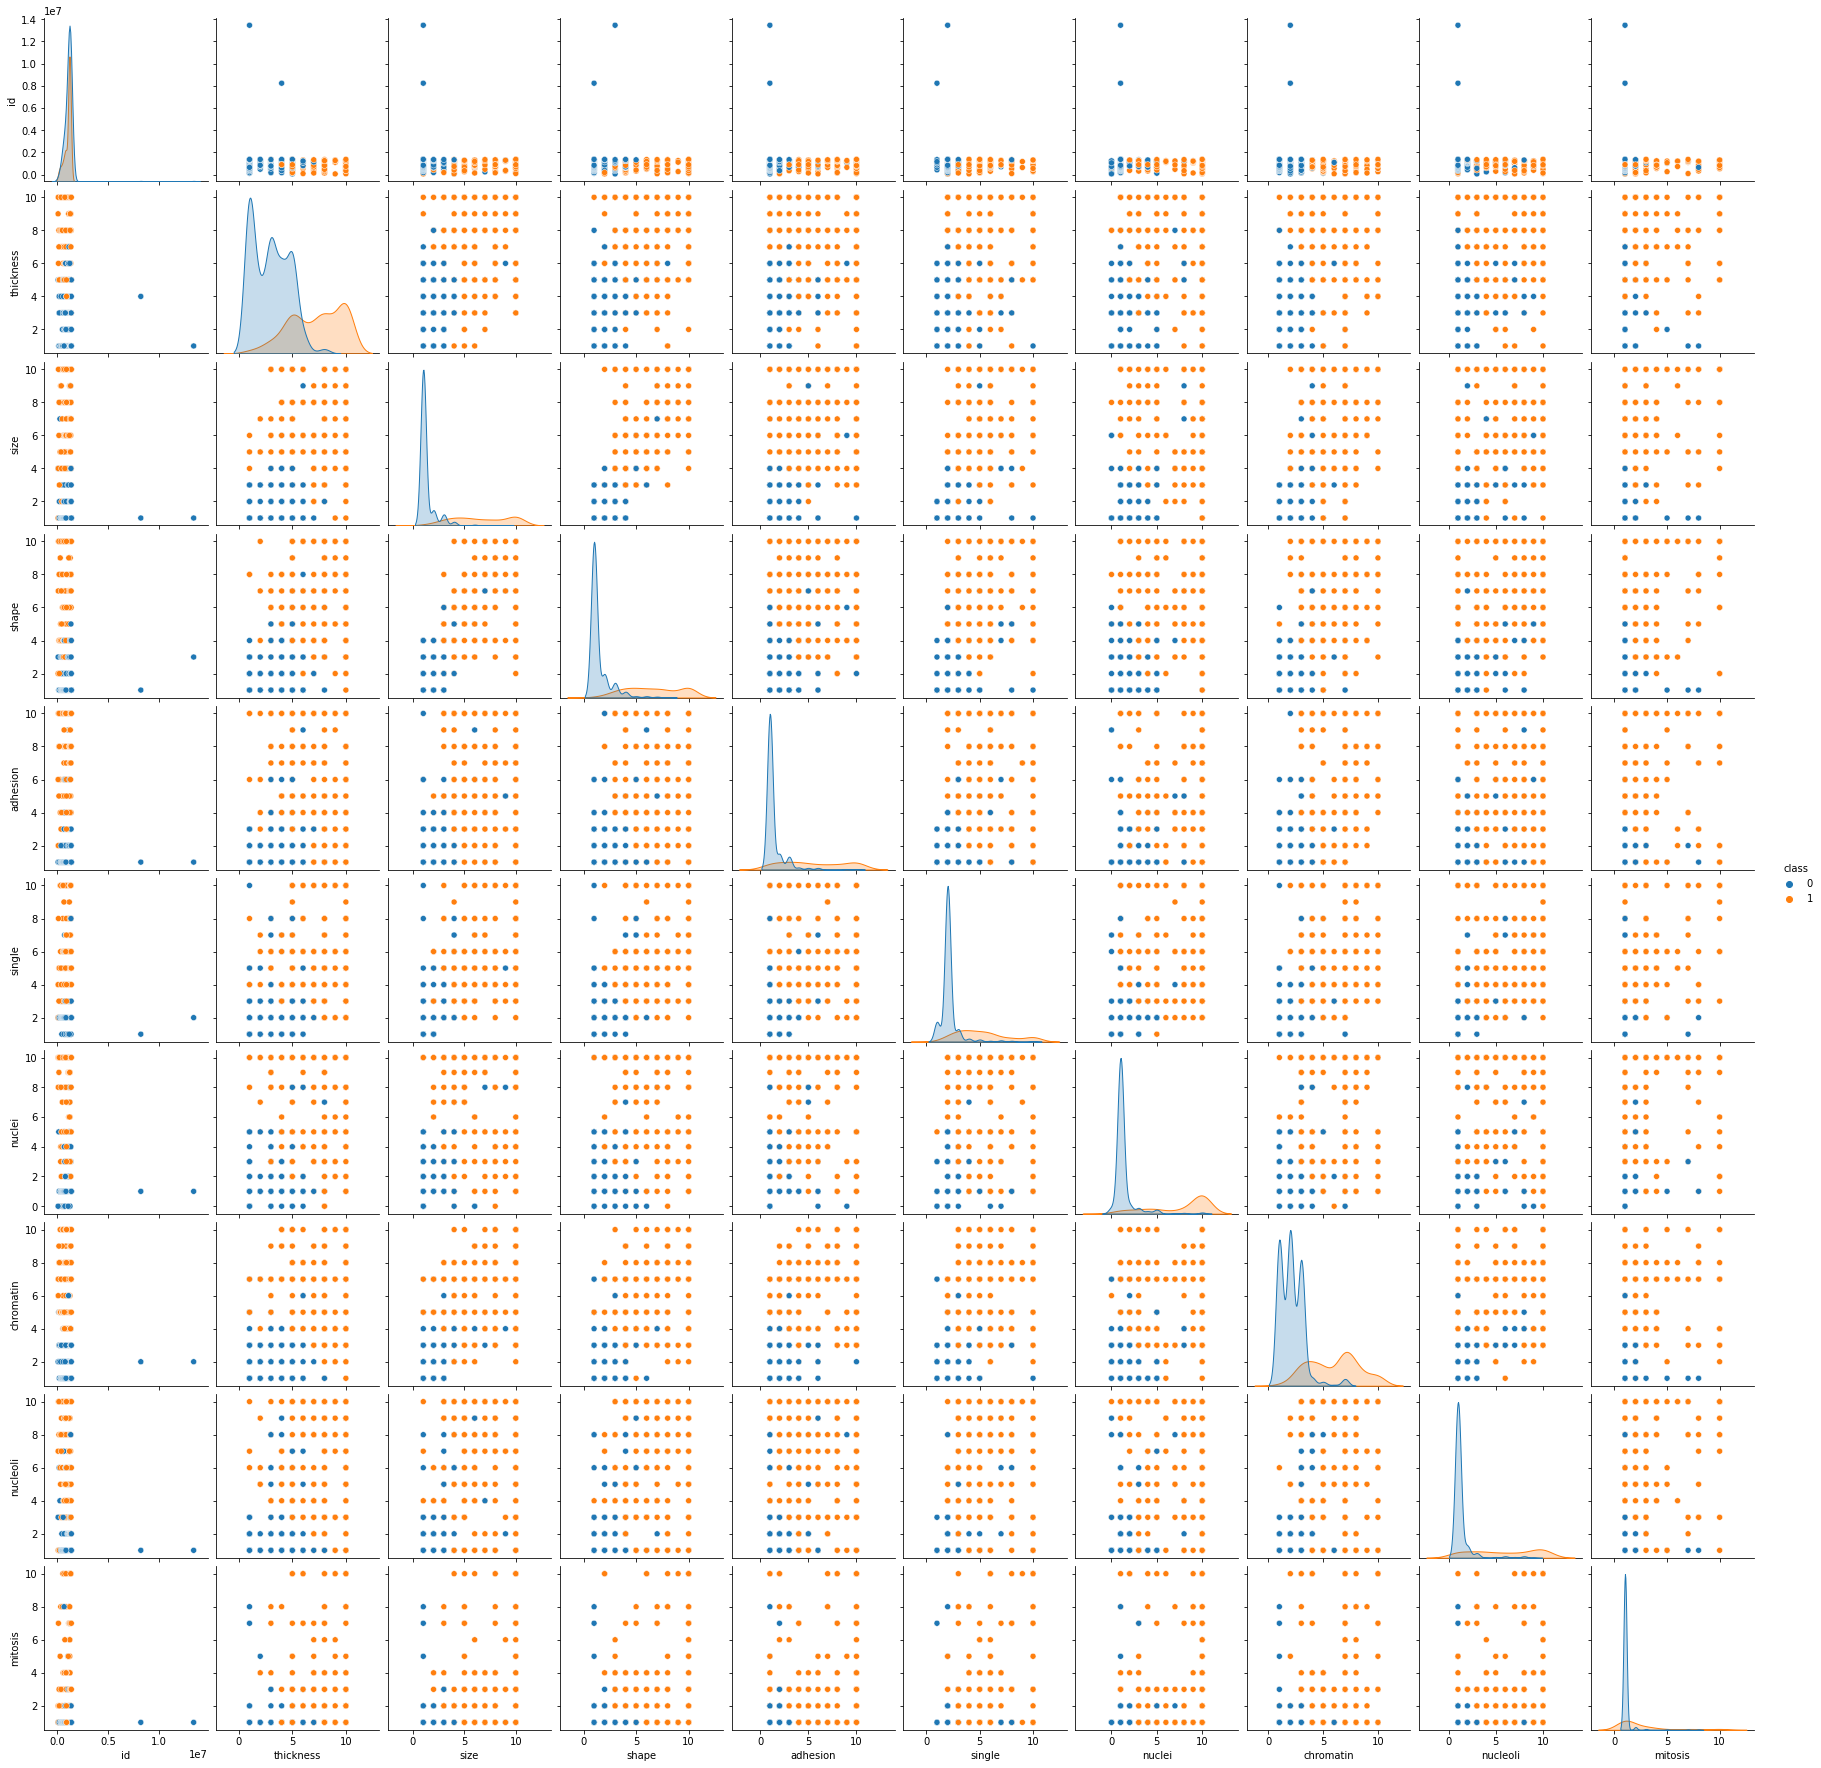

In [18]:
# Create a pairplot with different colours for further analysis. 
coloured_plot = sns.pairplot(data = df, hue = "class")

As explained previously (in the copy of the Assignment 1 Notebook), there is some overlap between the two classes for each different predictor variable (x variable), therefore, our classifier overall may not be the best at predicting class.

We need to choose 5 predictor variables that seem the best to generate a new classifier based on teh output of this plot. We need to take the overlap between classes into account. 

Because ID and Mitosis have both classes peaking at the same point, we can rule these out as good predictor variables for our model. 
Ideally, we could also like to avoid a class (indicated in orange) that seems to be flat msot of the way with no peak, this could be hard to avoid. 

Despite there being a fair amount of overlap (which unfortunately would be incredibly difficult to avoid), based on 'eyeballing' the above plot, we believe that the best predictor variables to use are thickness, shape, single, nuclei and chromatin.

In [19]:
# Break down x into subset for training and testing. 
# Potentially redundant code but gives a specific variable for our x variable subset...
x_sub = df.iloc[:, [1, 3, 5, 6, 7]]

print(x_sub)

# Generate xsub_train from x_train
xsub_train = x_train[["thickness", "shape", "single", "nuclei", "chromatin"]]

# Generate xsub_test from x_test
xsub_test = x_test[["thickness", "shape", "single", "nuclei", "chromatin"]]

#Check
print(xsub_train.shape, xsub_test.shape)

     thickness  shape  single  nuclei  chromatin
0            5      1       2     1.0          3
1            5      4       7    10.0          3
2            3      1       2     2.0          3
3            6      8       3     4.0          3
4            4      1       2     1.0          3
..         ...    ...     ...     ...        ...
694          3      1       3     2.0          1
695          2      1       2     1.0          1
696          5     10       7     3.0          8
697          4      6       3     4.0         10
698          4      8       4     5.0         10

[699 rows x 5 columns]
(524, 5) (175, 5)


We are now going to train an SVC classifier using the new training set we have generated for the predictor variables. We will use this classifier to predict the predictor variable test set we just generated. 

In [20]:
# Train SVC Classifier
# Libraries should already be imported from Assignment 1 portion of notebook. 
subset_model = SVC().fit(xsub_train, y_train)
print('New classifier trained...')

New classifier trained...


In [21]:
# Predict using the classifier just trained. 
subset_predictions = subset_model.predict(xsub_test)
print(subset_predictions[:9])

[1 0 0 0 0 0 0 1 0]


We are now going to generate the confusion matrix and classification report. 

#### Classification Report

In [22]:
# Libraries already imported...
# Generate and print the classification report.
subset_report = classification_report(y_test, subset_predictions)
print(subset_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       112
           1       1.00      0.97      0.98        63

    accuracy                           0.99       175
   macro avg       0.99      0.98      0.99       175
weighted avg       0.99      0.99      0.99       175



#### Confusion Matrix

In [23]:
# Libraries already imported...
# Generate and print the confusion matrix. 
subset_confusion = confusion_matrix(y_test, subset_predictions)
print(subset_confusion)

[[112   0]
 [  2  61]]


Comment on whether the results were better than last weeks: The subset result has a higher precision value of 0.98 for class 0 and 1.00 for class 1 than all of the features which had an precision value of 0.97 for class 0 and 1.00 for class 1. According to these precision values, the subset result is better.

Setting up a kNN classifier with the sklearn library, train with k = 3

In [24]:
# Importing the library classifier
from sklearn.neighbors import KNeighborsClassifier
# Setting the K value to be 3
neigh = KNeighborsClassifier(n_neighbors=3)
# Train the Classifier
neigh.fit(x_train, y_train)
print('kNN classifier trained...')

kNN classifier trained...


In [25]:
# Making a prediction and assigning it to a variable
kNN_prediction = neigh.predict(x_test)
print(kNN_prediction)

[1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0
 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0]


Now we will generate the classification report and confusion matrix.

In [26]:
# Libraries already imported...
# Generate and print the classification report.
kNN_report = classification_report(y_test, kNN_prediction)
print(kNN_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       112
           1       1.00      0.92      0.96        63

    accuracy                           0.97       175
   macro avg       0.98      0.96      0.97       175
weighted avg       0.97      0.97      0.97       175



In [27]:
# Libraries already imported...
# Generate and print the confusion matrix. 
kNN_confusion = confusion_matrix(y_test, kNN_prediction)
print(kNN_confusion)

[[112   0]
 [  5  58]]


Now we shall repeat the kNN training and testing process, but this time with k = 10

In [28]:
# Libraries are already imported
# Setting the K value to be 10
neigh = KNeighborsClassifier(n_neighbors=10)
# Train the Classifier
neigh.fit(x_train, y_train)
print('kNN classifier trained...')

kNN classifier trained...


In [29]:
# Making a prediction and assigning it to a variable
kNN_prediction = neigh.predict(x_test)
print(kNN_prediction)

[1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0
 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1
 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0]


Now we will generate the classification report and confusion matrix

In [30]:
# Libraries already imported...
# Generate and print the classification report.
kNN_report = classification_report(y_test, kNN_prediction)
print(kNN_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       112
           1       1.00      0.92      0.96        63

    accuracy                           0.97       175
   macro avg       0.98      0.96      0.97       175
weighted avg       0.97      0.97      0.97       175



In [31]:
# Libraries already imported...
# Generate and print the confusion matrix. 
kNN_confusion = confusion_matrix(y_test, kNN_prediction)
print(kNN_confusion)

[[112   0]
 [  5  58]]


Discussion of which approach was best:

According to the tests carried out, the subset of five features generated the highest precision of 0.98 for class 0 and 1.00 for class 1. Both K values for the kNN classifiers generated the same classification report and confusion matrix. The kNN classifier and the SVN with all features both had lower precision values for class 0 (0.96 and 0.97 respectively). Therefore according to this observation, the subset of five features seems to be the best approach.

However, Stefenie's student ID was not a good seed for the kNN classifiers as both tests with different values for K generated the same classification report and confusion matrix. This is because when we changed the seed  to a different value ie 1506428 instead of 1506427 the classification report and the confusion matrix would be different for the different values of K. Therefore to investigate further, we experimented using a different student ID 1524408

In [ ]:
# Split the dataset again, using a different ID as the random seed this time
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.25, random_state = 1524408)
# Check
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(524, 9) (175, 9) (524,) (175,)


In [33]:
# Redoing the kNN tests
# Libraries are already imported
# Setting the K value to be 3
neigh = KNeighborsClassifier(n_neighbors=3)
# Train the Classifier
neigh.fit(x_train, y_train)
print('kNN classifier trained...')
# Making a prediction and assigning it to a variable
kNN_prediction = neigh.predict(x_test)
print(kNN_prediction)
# Generate and print the classification report.
kNN_report = classification_report(y_test, kNN_prediction)
print(kNN_report)
# Generate and print the confusion matrix. 
kNN_confusion = confusion_matrix(y_test, kNN_prediction)
print(kNN_confusion)

kNN classifier trained...
[0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       105
           1       0.93      0.99      0.96        70

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175

[[100   5]
 [  1  69]]


In [34]:
# Setting the K value to be 10
neigh = KNeighborsClassifier(n_neighbors=10)
# Train the Classifier
neigh.fit(x_train, y_train)
print('kNN classifier trained...')
# Making a prediction and assigning it to a variable
kNN_prediction = neigh.predict(x_test)
print(kNN_prediction)
# Generate and print the classification report.
kNN_report = classification_report(y_test, kNN_prediction)
print(kNN_report)
# Generate and print the confusion matrix. 
kNN_confusion = confusion_matrix(y_test, kNN_prediction)
print(kNN_confusion)

kNN classifier trained...
[0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1
 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       105
           1       0.94      0.97      0.96        70

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175

[[101   4]
 [  2  68]]


In this case where the different student ID was used, the precision values are different for the different values of K, however the weighted average of precision are the same. Therefore it seems that both K values are equally as good an approach. 